In [218]:
import pandas as pd

In [219]:
import numpy as np

In [220]:
import matplotlib.pyplot as plt

In [221]:
import matplotlib.ticker as ticker

In [222]:
import seaborn as sns

In [223]:
balanco = pd.read_csv("balanços/VIVR3.csv", index_col=0, header=1)

In [224]:
balanco = balanco.T[::-1]

In [225]:
balanco.head(3)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
31/03/2008,1.574.188,1.038.745,21.671,0,278.915,705.870,0,0,0,32.289,...,730.470,785.915,0,0,0,-55.445,0,0,0,0
30/06/2008,1.655.467,982.058,9.898,0,277.777,656.909,0,0,0,37.474,...,731.049,785.915,0,0,0,-54.866,0,0,0,0
30/09/2008,1.714.766,868.794,37.253,0,273.832,507.207,0,0,0,50.502,...,709.240,785.915,0,0,0,-76.675,0,0,0,0


In [230]:
cotacao = pd.read_csv("cotações/VIVR3.csv", index_col=0)

In [231]:
cotacao = cotacao[::-1]

In [232]:
cotacao = cotacao.applymap(lambda x: float(x.replace('.', '')
                                           .replace(',', '.')                                           
                                           .replace('%', '')))


In [236]:
cotacao[::-1].head(3)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
07.11.2018,0.63,0.59,0.63,0.56,58.64,3.28
06.11.2018,0.61,0.59,0.73,0.58,75.38,-6.15
05.11.2018,0.65,0.53,0.65,0.51,72.65,30.00


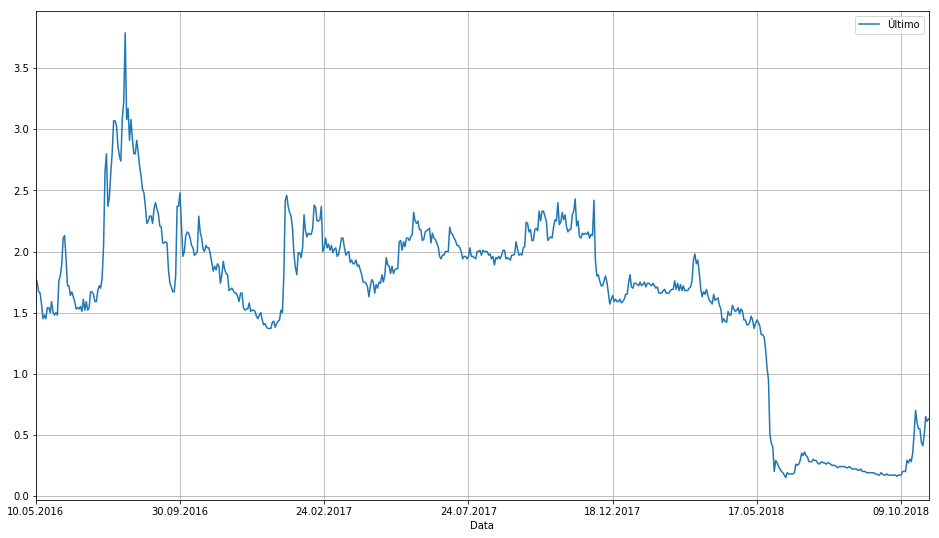

In [240]:

cotacao[["Último"]][-620:].plot(figsize=(16,9), grid=True)

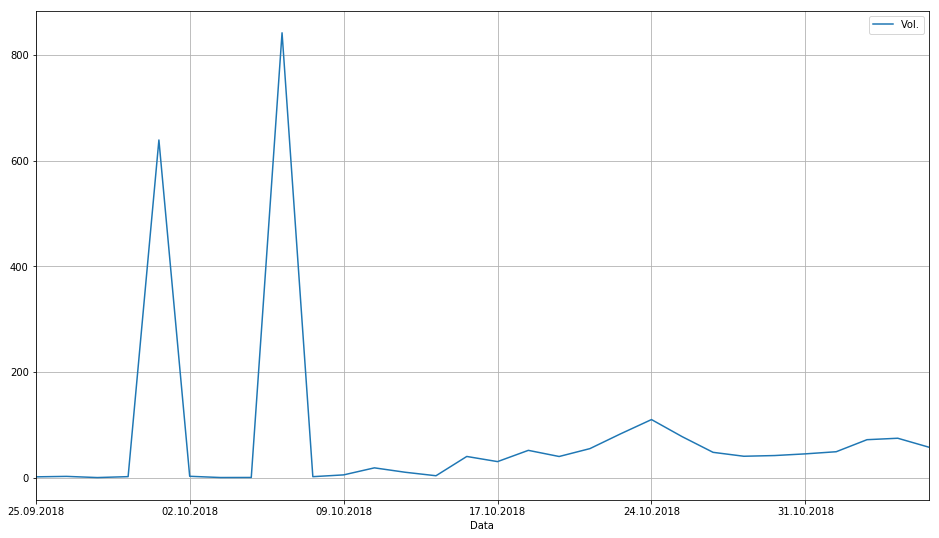

In [243]:
cotacao[["Vol."]][-30:].plot(figsize=(16,9), grid=True)

#### Convert string to int 

In [127]:
balanco = balanco.applymap(lambda x: int(x.replace('.', '')))

In [128]:
balanco.head(3)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
31/03/2008,1574188,1038745,21671,0,278915,705870,0,0,0,32289,...,730470,785915,0,0,0,-55445,0,0,0,0
30/06/2008,1655467,982058,9898,0,277777,656909,0,0,0,37474,...,731049,785915,0,0,0,-54866,0,0,0,0
30/09/2008,1714766,868794,37253,0,273832,507207,0,0,0,50502,...,709240,785915,0,0,0,-76675,0,0,0,0


In [129]:
%matplotlib inline


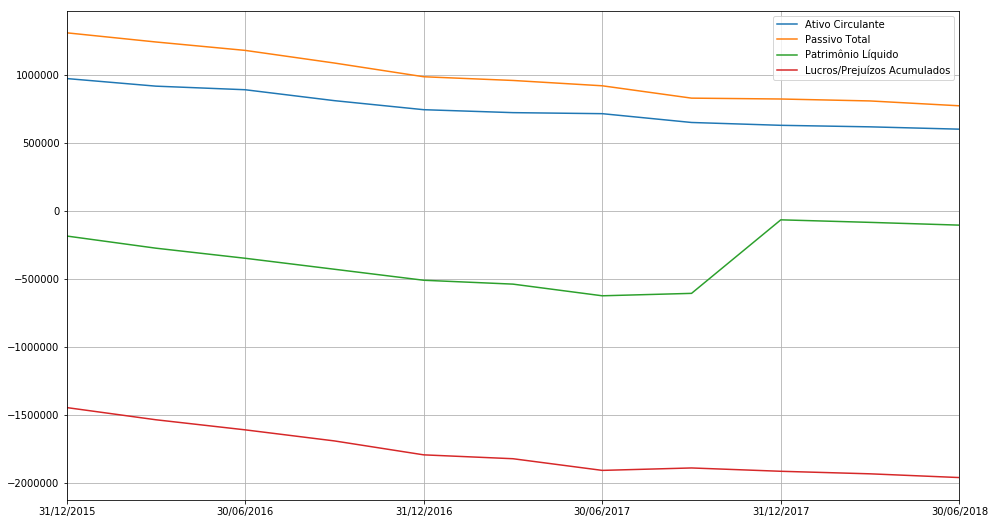

In [209]:
balanco[['Ativo Circulante', 'Passivo Total', 'Patrimônio Líquido', 'Lucros/Prejuízos Acumulados']][-11:].plot(figsize=(16,9), grid=True)

In [163]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '{:1.1f}B'.format(x*1e-6)
    else:
        s = '{:1.0f}M'.format(x*1e-3)
    return s

formatter_money = ticker.FuncFormatter(currency)

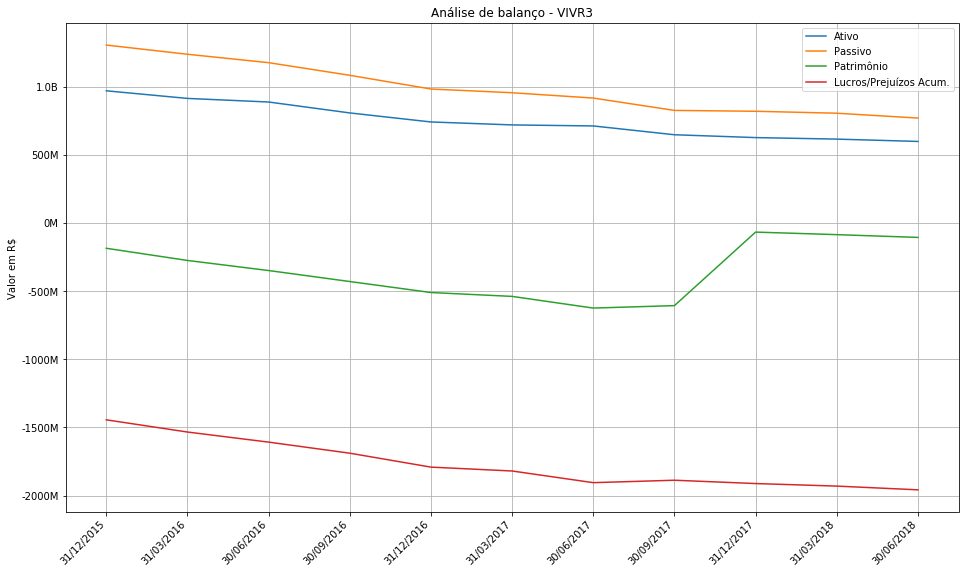

In [210]:
balanco = balanco[-11:]
fig, grafico = plt.subplots(figsize=(16,9))

x = np.arange(balanco.index.size)

grafico.plot(x, balanco["Ativo Circulante"].tolist(), label='Ativo')
grafico.plot(x, balanco["Passivo Total"].tolist(), label='Passivo')
grafico.plot(x, balanco["Patrimônio Líquido"].tolist(), label='Patrimônio')
grafico.plot(x, balanco["Lucros/Prejuízos Acumulados"].tolist(), label='Lucros/Prejuízos Acum.')

plt.xticks(x, balanco.index)

grafico.grid()

grafico.legend()

labels = grafico.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

grafico.set(ylabel='Valor em R$', title='Análise de balanço - VIVR3')

grafico.yaxis.set_major_formatter(formatter_money)



